In [21]:
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [22]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Эпоха')
    plt.ylabel('Потери')
    plt.legend()
    plt.grid(True)

### Обработка набора данных

In [23]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

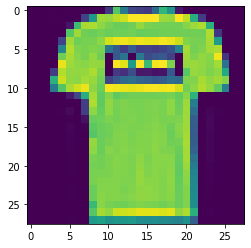

In [24]:
plt.imshow(x_train[1])

In [25]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [26]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [29]:
x_train.shape

(60000, 784)

In [30]:
y_train.shape

(60000,)

In [31]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [33]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [34]:
y_train.shape

(60000, 10)

In [35]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
input_shape = (x_train.shape[1])

In [37]:
input_shape

784

In [38]:
res = np.array([0, 2, 5, 2, 1, 4, 2, 3, 4, 500])
res / sum(res)

array([0.        , 0.00382409, 0.00956023, 0.00382409, 0.00191205,
       0.00764818, 0.00382409, 0.00573614, 0.00764818, 0.95602294])

In [39]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [40]:
x_train.shape

(60000, 784)

In [41]:
batch_size = 128
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 2s 3ms/step - loss: 0.5539 - accuracy: 0.8088 - val_loss: 0.4078 - val_accuracy: 0.8530
Epoch 2/20
422/422 [==============================] - 1s 2ms/step - loss: 0.3961 - accuracy: 0.8584 - val_loss: 0.3943 - val_accuracy: 0.8603
Epoch 3/20
422/422 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8731 - val_loss: 0.3639 - val_accuracy: 0.8715
Epoch 4/20
422/422 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.8815 - val_loss: 0.3514 - val_accuracy: 0.8768
Epoch 5/20
422/422 [==============================] - 1s 2ms/step - loss: 0.3084 - accuracy: 0.8875 - val_loss: 0.3411 - val_accuracy: 0.8735
Epoch 6/20
422/422 [==============================] - 1s 2ms/step - loss: 0.2890 - accuracy: 0.8936 - val_loss: 0.3376 - val_accuracy: 0.8777
Epoch 7/20
422/422 [==============================] - 1s 2ms/step - loss: 0.2786 - accuracy: 0.8969 - val_loss: 0.3390 - val_accuracy: 0.8762
Epoch 

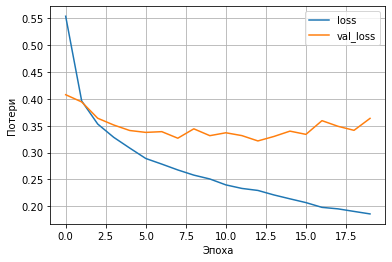

In [42]:
plot_loss(history)

### Обучение сверточной сети

In [43]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [44]:
x_train.shape

(60000, 28, 28)

In [45]:
np.expand_dims(x_train, -1).shape

(60000, 28, 28, 1)

In [46]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [47]:
y_train.shape

(60000, 10)

In [48]:
input_shape

(28, 28, 1)

In [49]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               540900    
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

Epoch 1/5
422/422 [==============================] - 14s 32ms/step - loss: 0.4854 - accuracy: 0.8304 - val_loss: 0.3739 - val_accuracy: 0.8650
Epoch 2/5
422/422 [==============================] - 21s 51ms/step - loss: 0.3235 - accuracy: 0.8852 - val_loss: 0.3001 - val_accuracy: 0.8938
Epoch 3/5
422/422 [==============================] - 92s 218ms/step - loss: 0.2809 - accuracy: 0.8991 - val_loss: 0.3066 - val_accuracy: 0.8898
Epoch 4/5
422/422 [==============================] - 14s 33ms/step - loss: 0.2508 - accuracy: 0.9104 - val_loss: 0.2744 - val_accuracy: 0.9003
Epoch 5/5
422/422 [==============================] - 14s 33ms/step - loss: 0.2310 - accuracy: 0.9160 - val_loss: 0.2597 - val_accuracy: 0.9083


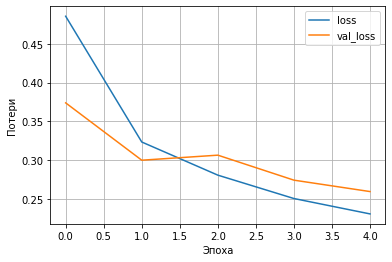

In [50]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
plot_loss(history)

In [51]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.273410439491272
Test accuracy: 0.9006999731063843


Увеличиваем количество фильтров

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_8 (Dense)             (None, 100)               1254500   
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,256,150
Trainable params: 1,256,150
Non-trainable params: 0
____________________________________________

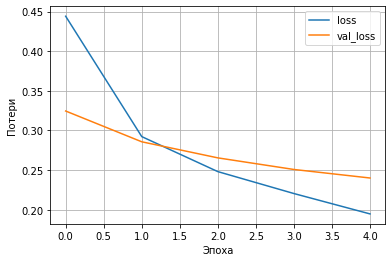

In [52]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
plot_loss(history)

In [53]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.25871342420578003
Test accuracy: 0.9067999720573425


### Ранняя остановка

In [54]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
input_shape = (x_train.shape[1])

In [55]:
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
callbacks=[callback]

In [56]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [57]:
batch_size = 128
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                    validation_split=0.1, callbacks=[callback])

Epoch 1/50
422/422 [==============================] - 2s 3ms/step - loss: 0.5659 - accuracy: 0.8019 - val_loss: 0.4053 - val_accuracy: 0.8542
Epoch 2/50
422/422 [==============================] - 1s 3ms/step - loss: 0.3915 - accuracy: 0.8612 - val_loss: 0.3805 - val_accuracy: 0.8658
Epoch 3/50
422/422 [==============================] - 1s 3ms/step - loss: 0.3499 - accuracy: 0.8742 - val_loss: 0.3717 - val_accuracy: 0.8667
Epoch 4/50
422/422 [==============================] - 1s 2ms/step - loss: 0.3258 - accuracy: 0.8818 - val_loss: 0.3314 - val_accuracy: 0.8787
Epoch 5/50
422/422 [==============================] - 1s 2ms/step - loss: 0.3027 - accuracy: 0.8896 - val_loss: 0.3518 - val_accuracy: 0.8747
Epoch 6/50
422/422 [==============================] - 1s 3ms/step - loss: 0.2947 - accuracy: 0.8921 - val_loss: 0.3345 - val_accuracy: 0.8773
Epoch 7/50
422/422 [==============================] - 1s 2ms/step - loss: 0.2780 - accuracy: 0.8966 - val_loss: 0.3270 - val_accuracy: 0.8798
Epoch 

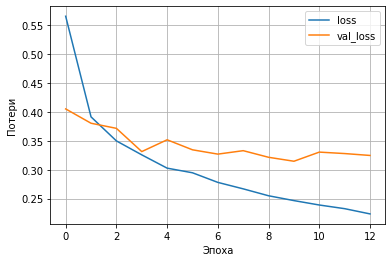

In [58]:
plot_loss(history)

In [59]:
from keras.callbacks import ModelCheckpoint

In [60]:
import datetime


In [61]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [62]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [49]:
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=0,
    save_best_only=True, mode='auto', save_freq=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                    validation_split=0.1, 
                    callbacks=[checkpoint, early_stopping, tensorboard_callback])

Epoch 1/50
422/422 [==============================] - 14s 31ms/step - loss: 0.5656 - accuracy: 0.8037 - val_loss: 0.4395 - val_accuracy: 0.8450
Epoch 2/50
422/422 [==============================] - 2s 4ms/step - loss: 0.3943 - accuracy: 0.8598 - val_loss: 0.4021 - val_accuracy: 0.8558
Epoch 3/50
422/422 [==============================] - 2s 4ms/step - loss: 0.3525 - accuracy: 0.8720 - val_loss: 0.3719 - val_accuracy: 0.8652
Epoch 4/50
422/422 [==============================] - 2s 5ms/step - loss: 0.3244 - accuracy: 0.8821 - val_loss: 0.3346 - val_accuracy: 0.8753
Epoch 5/50
422/422 [==============================] - 1s 3ms/step - loss: 0.3047 - accuracy: 0.8887 - val_loss: 0.3484 - val_accuracy: 0.8710
Epoch 6/50
422/422 [==============================] - 2s 4ms/step - loss: 0.2929 - accuracy: 0.8935 - val_loss: 0.3581 - val_accuracy: 0.8735
Epoch 7/50
422/422 [==============================] - 2s 4ms/step - loss: 0.2806 - accuracy: 0.8969 - val_loss: 0.3311 - val_accuracy: 0.8807
Epoc